难，有些还没有理解，所以只给出结论

<div  align="center">    
    <img src = './img/28.jpg', width=600, height=200/>
    <img src = './img/29.jpg', width=600, height=200/>
</div>

In [1]:
# coding=utf-8
#svm原生代码实现，使用最简单的方法实现SMO
from numpy import *

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
# 数据的加载
def loadDataSet(fileName):
    dataMat = []; labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = line.strip().split('\t')
        dataMat.append([float(lineArr[0]), float(lineArr[1])])
        labelMat.append(float(lineArr[2]))
    return dataMat,labelMat

#随机选择一个不等于i值的j （例如选择alpha1 和 alpha2）
def selectJrand(i,m):
    j=i
    while (j==i):
        j = int(random.uniform(0,m))
    return j

#进行剪辑
def clipAlpha(aj,H,L):
    if aj > H:
        aj = H
    if L > aj:
        aj = L
    return aj

def smoSimple(dataMatIn, classLabels, C, toler, maxIter):
    dataMatrix = mat(dataMatIn); labelMat = mat(classLabels).transpose()
    b = 0; m,n = shape(dataMatrix)
    alphas = mat(zeros((m,1)))
    iter = 0
    while (iter < maxIter):
        alphaPairsChanged = 0
        for i in range(m):
            gXi = float(multiply(alphas,labelMat).T*(dataMatrix*dataMatrix[i,:].T)) + b
            Ei = gXi - float(labelMat[i])
            if ((labelMat[i]*Ei < -toler) and (alphas[i] < C)) or ((labelMat[i]*Ei > toler) and (alphas[i] > 0)):
                j = selectJrand(i,m)
                gXj = float(multiply(alphas,labelMat).T*(dataMatrix*dataMatrix[j,:].T)) + b
                Ej = gXj - float(labelMat[j])
                alphaIold = alphas[i].copy(); alphaJold = alphas[j].copy();
                if (labelMat[i] != labelMat[j]):
                    L = max(0, alphas[j] - alphas[i])
                    H = min(C, C + alphas[j] - alphas[i])
                else:
                    L = max(0, alphas[j] + alphas[i] - C)
                    H = min(C, alphas[j] + alphas[i])
                if L==H: print("L==H"); continue
                eta = 2.0 * dataMatrix[i,:]*dataMatrix[j,:].T - dataMatrix[i,:]*dataMatrix[i,:].T - dataMatrix[j,:]*dataMatrix[j,:].T
                if eta >= 0: print("eta>=0"); continue
                alphas[j] -= labelMat[j]*(Ei - Ej)/eta
                alphas[j] = clipAlpha(alphas[j],H,L)
                if (abs(alphas[j] - alphaJold) < 0.00001): print("j not moving enough"); continue
                alphas[i] += labelMat[j]*labelMat[i]*(alphaJold - alphas[j])

                b1 = b - Ei- labelMat[i]*(alphas[i]-alphaIold)*dataMatrix[i,:]*dataMatrix[i,:].T - labelMat[j]*(alphas[j]-alphaJold)*dataMatrix[i,:]*dataMatrix[j,:].T
                b2 = b - Ej- labelMat[i]*(alphas[i]-alphaIold)*dataMatrix[i,:]*dataMatrix[j,:].T - labelMat[j]*(alphas[j]-alphaJold)*dataMatrix[j,:]*dataMatrix[j,:].T
                if (0 < alphas[i]) and (C > alphas[i]): b = b1
                elif (0 < alphas[j]) and (C > alphas[j]): b = b2
                else: b = (b1 + b2)/2.0
                alphaPairsChanged += 1
                print("iter: %d i:%d, pairs changed %d" % (iter,i,alphaPairsChanged))
        if (alphaPairsChanged == 0): iter += 1
        else: iter = 0
        print("iteration number: %d" % iter)
    return b,alphas

In [3]:
# 计算我们的W
def calcWs(alphas,dataArr,classLabels):
    X = mat(dataArr); labelMat = mat(classLabels).transpose()
    m,n = shape(X)
    w = zeros((n,1))
    for i in range(m):
        w += multiply(alphas[i]*labelMat[i],X[i,:].T)
    return w

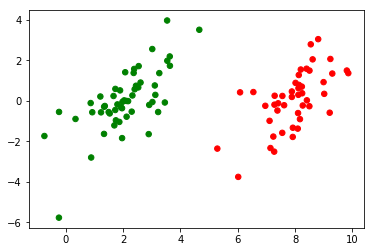

In [5]:
dataMat,labelMat = loadDataSet('./files/testSet.txt')
#画出原始的数据图像
fig = plt.figure()
ax = fig.add_subplot(111)
cm_dark = mpl.colors.ListedColormap(['g', 'r'])
ax.scatter(array(dataMat)[:,0],array(dataMat)[:,1],c=array(labelMat).squeeze(),cmap=cm_dark,s=30)
plt.show()

In [7]:
b,alphas = smoSimple(dataMat,labelMat,0.6,0.001,40)
w = calcWs(alphas,dataMat,labelMat)
print('b=',b)
print('alphas=',alphas)
print('w=',w)

iter: 0 i:0, pairs changed 1
iter: 0 i:2, pairs changed 2
L==H
j not moving enough
L==H
L==H
L==H
L==H
L==H
iter: 0 i:23, pairs changed 3
L==H
j not moving enough
iter: 0 i:26, pairs changed 4
iter: 0 i:29, pairs changed 5
j not moving enough
L==H
j not moving enough
j not moving enough
L==H
j not moving enough
iter: 0 i:50, pairs changed 6
iter: 0 i:51, pairs changed 7
iter: 0 i:54, pairs changed 8
j not moving enough
iter: 0 i:80, pairs changed 9
j not moving enough
iteration number: 0
j not moving enough
iter: 0 i:2, pairs changed 1
j not moving enough
L==H
j not moving enough
iter: 0 i:10, pairs changed 2
iter: 0 i:11, pairs changed 3
j not moving enough
L==H
j not moving enough
L==H
j not moving enough
iter: 0 i:29, pairs changed 4
iter: 0 i:31, pairs changed 5
j not moving enough
iter: 0 i:50, pairs changed 6
iter: 0 i:51, pairs changed 7
L==H
iter: 0 i:54, pairs changed 8
j not moving enough
j not moving enough
j not moving enough
iteration number: 0
iter: 0 i:0, pairs changed 1

j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 0
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 1
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 2
j not moving enough
j not moving enough
j not moving enough
iter: 2 i:29, pairs changed 1
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 0
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 1
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration 

j not moving enough
j not moving enough
iteration number: 32
j not moving enough
j not moving enough
j not moving enough
iteration number: 33
j not moving enough
j not moving enough
j not moving enough
iteration number: 34
j not moving enough
j not moving enough
j not moving enough
iteration number: 35
j not moving enough
j not moving enough
j not moving enough
iteration number: 36
j not moving enough
j not moving enough
j not moving enough
iteration number: 37
j not moving enough
j not moving enough
j not moving enough
iteration number: 38
j not moving enough
j not moving enough
j not moving enough
iteration number: 39
j not moving enough
j not moving enough
j not moving enough
iteration number: 40
b= [[-3.87540774]]
alphas= [[0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000

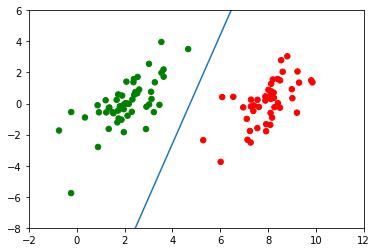

In [17]:
#画决策平面
fig = plt.figure()
ax = fig.add_subplot(111)
cm_dark = mpl.colors.ListedColormap(['g', 'r'])
ax.scatter(array(dataMat)[:,0],array(dataMat)[:,1],c=array(labelMat).squeeze(),cmap=cm_dark,s=30)
x = arange(-2.0, 12.0, 0.1)
y = (-w[0]*x - b)/w[1]  # w[0]x1 + w[1]x2 + b = 0 ==> 可以得出x2的值，从而在二维中画出
ax.plot(x,y.reshape(-1,1))
ax.axis([-2,12,-8,6])
plt.show()

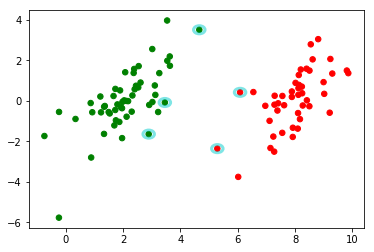

In [18]:
#画支持向量
fig = plt.figure()
ax = fig.add_subplot(111)
cm_dark = mpl.colors.ListedColormap(['g', 'r'])
ax.scatter(array(dataMat)[:,0],array(dataMat)[:,1],c=array(labelMat).squeeze(),cmap=cm_dark,s=30)
alphas_non_zeros_index = where(alphas>0)  # appha > 0 说明是我们的支撑点
for i in alphas_non_zeros_index[0]:
    circle = Circle((dataMat[i][0], dataMat[i][1]), 0.2, facecolor='none', edgecolor=(0,0.8,0.8), linewidth=3, alpha=0.5)
    ax.add_patch(circle)
plt.show()

END